In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [90]:
#reading data
df = pd.read_csv('day.csv')

In [91]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [93]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

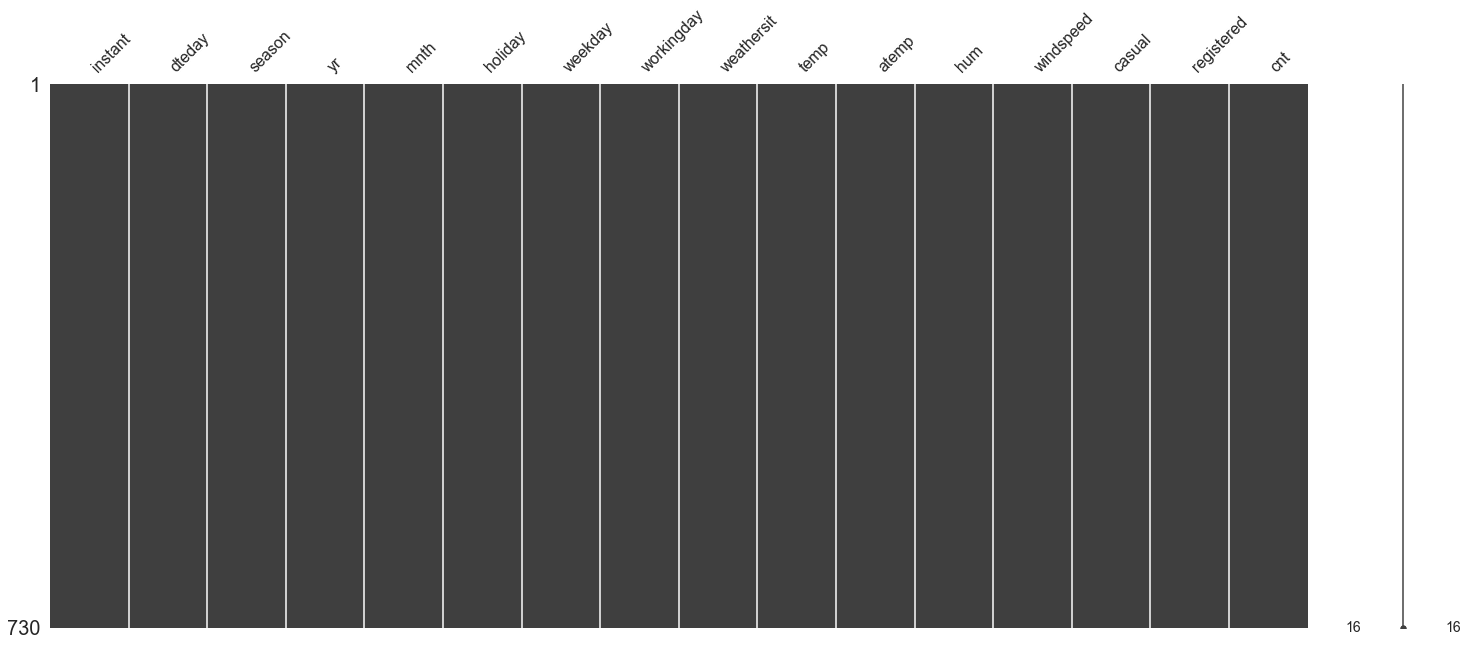

In [94]:
# Checking for missing values

import missingno as mn
mn.matrix(df)

In [95]:
# converting the data type
df['dteday'] =  pd.to_datetime(df['dteday'],format='%d-%m-%Y')
df['dteday'].dtype

dtype('<M8[ns]')

In [96]:
# Dropping the columns

cols=["instant","dteday","casual","registered"]

df = df.drop(columns=cols,axis=1)

In [97]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [98]:
#renaming columns
df.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

In [99]:
# Mapping the categorical column

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}
df.season=[season_cat[item] for item in df.season]

In [100]:
# Mapping weathersit into its categories

weather_cat={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}
df.weathersit=[weather_cat[item] for item in df.weathersit]

In [101]:
# Mapping month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 
           8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}
df.month=[month_cat[item] for item in df.month]

In [102]:
# Mapping weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}
df.weekday=[wkday_cat[item] for item in df.weekday]

In [103]:
#mapping year
yr_cat={0: '2018',1: '2019'}
df.year=[yr_cat[item] for item in df.year]

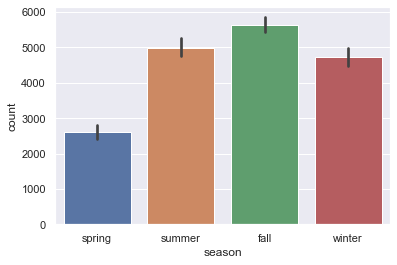

In [104]:
#chart/season
sns.barplot(x='season',y='count',data=df)
plt.show()

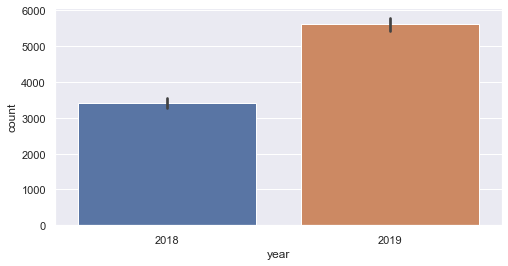

In [105]:
# year on year sales

plt.figure(figsize=(8,4))
sns.barplot(x='year',y='count',data=df)
plt.show()

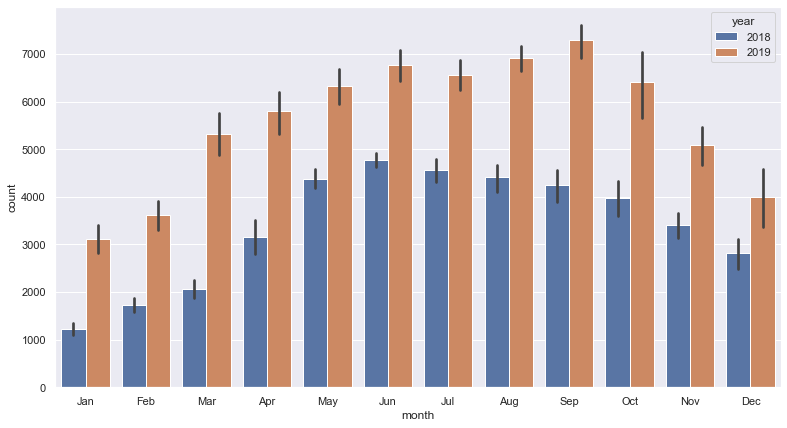

In [106]:
#monthly demand changes over both the year
plt.figure(figsize=(13,7))
sns.barplot(x='month',y='count',data=df,hue='year')
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='count'>

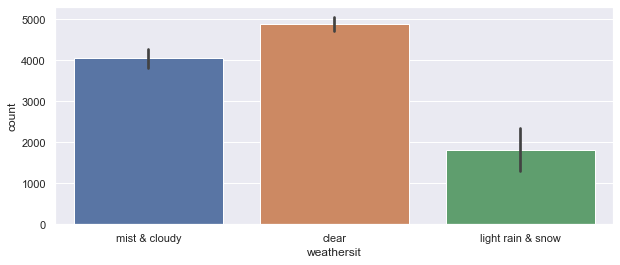

In [107]:
# Demand in various weathers

plt.figure(figsize=(10,4))
sns.barplot(x='weathersit',y='count',data=df)

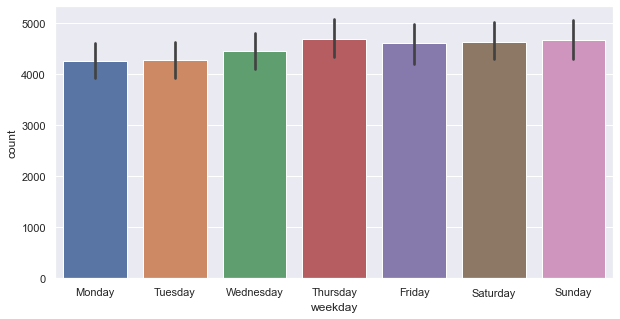

In [108]:
# days

plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='count',data=df)
plt.show()

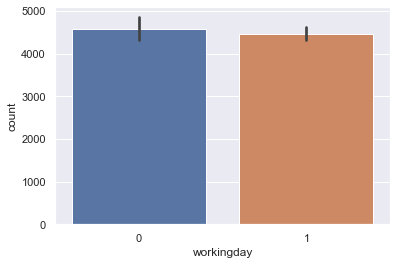

In [109]:
# non-working day vs workingday

sns.barplot(x='workingday',y='count',data=df)
plt.show()

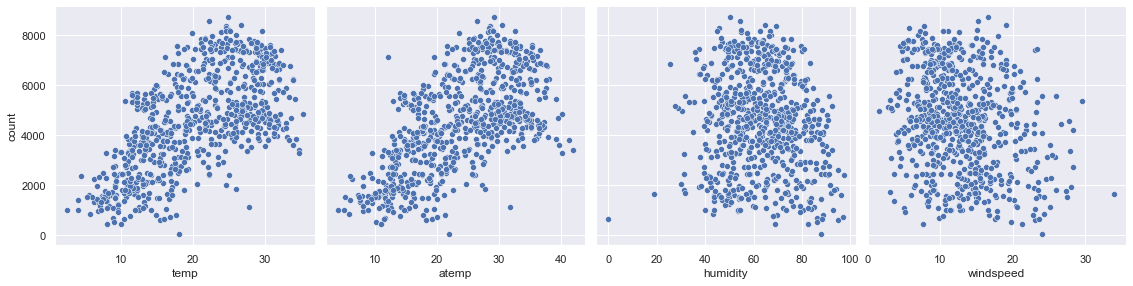

In [110]:
sns.pairplot(df, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4)
plt.show()

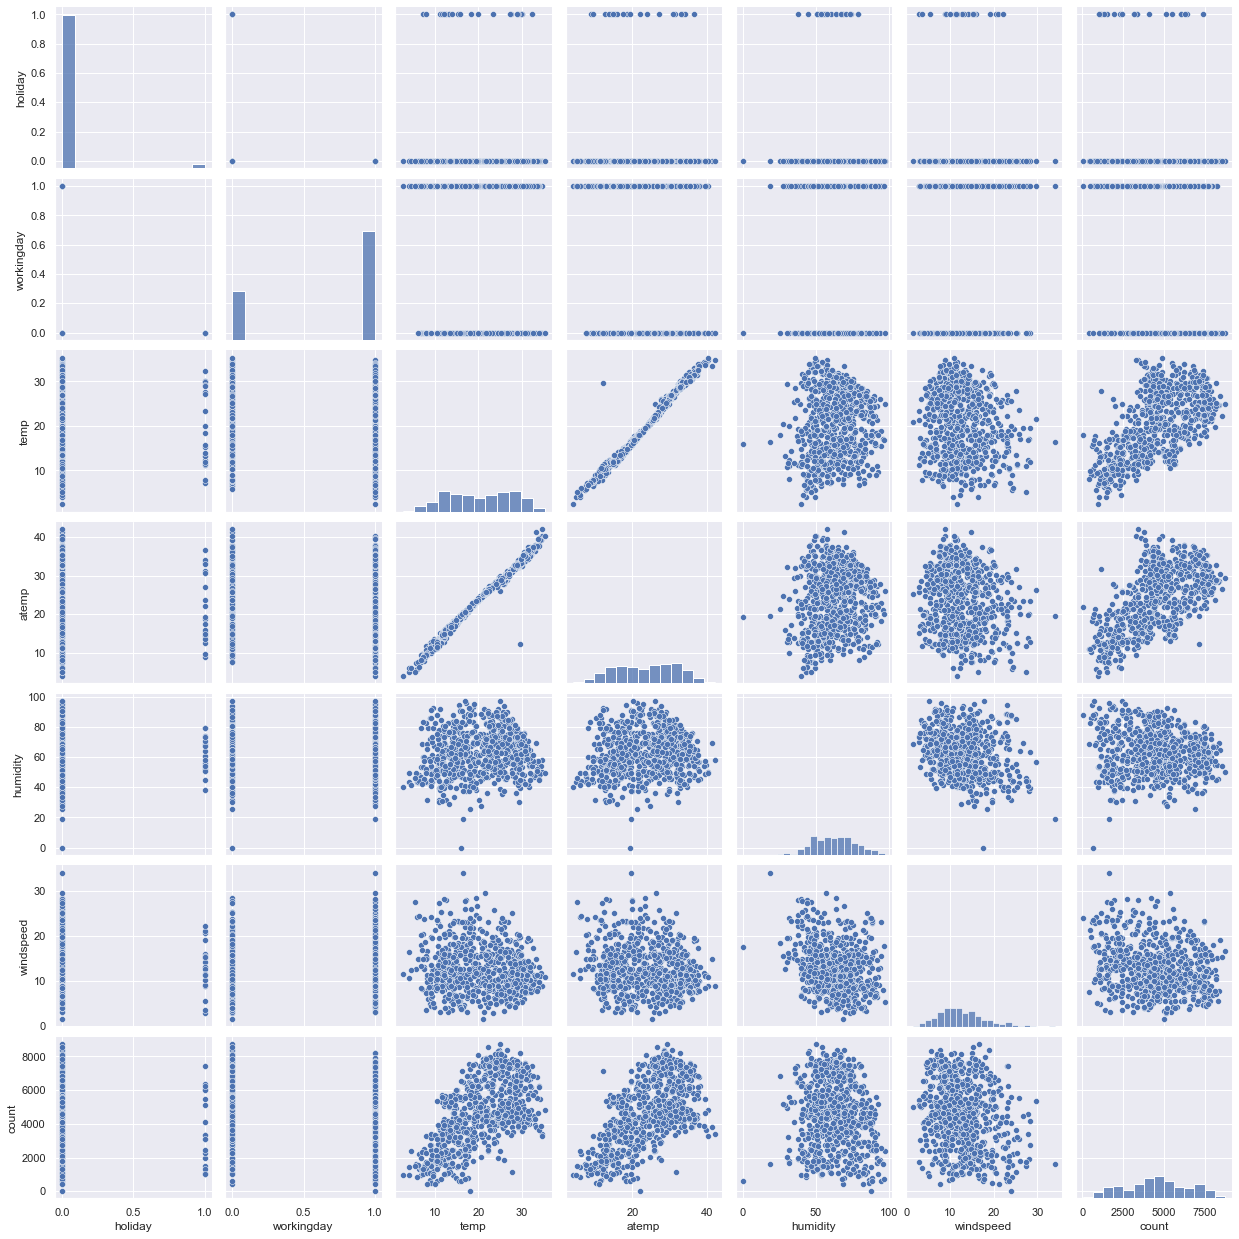

In [111]:
sns.pairplot(df)
plt.show()

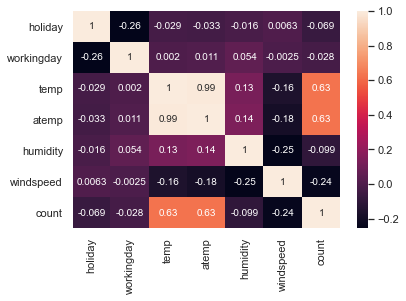

In [112]:
#correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [113]:
# Dropping  'atemp' 

df=df.drop("atemp",axis=1)

In [116]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [117]:
# creating dummy


seasons = pd.get_dummies(df['season'],drop_first=True)

working_day = pd.get_dummies(df['workingday'],drop_first=True)

weather= pd.get_dummies(df['weathersit'],drop_first=True)

month= pd.get_dummies(df['month'],drop_first=True)

week_day= pd.get_dummies(df['weekday'],drop_first=True)

# ADDING Dummies ti df
df= pd.concat([df,seasons,working_day,weather,month,week_day],axis=1)


In [118]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,2018,Jan,0,Monday,1,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,2018,Jan,0,Tuesday,1,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,2018,Jan,0,Wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,2018,Jan,0,Thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [119]:
# dropping variables for which we created the dummies

df.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [218]:
#train  test split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [219]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [220]:
# Applying Scaling 
num_vars=['temp','humidity','windspeed','count']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [221]:
df_train.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,1,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,2019,0,0.509887,0.575354,0.300794,0.864243,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
576,2019,0,0.815169,0.725633,0.264686,0.827658,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
426,2019,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,2019,0,0.245101,0.498067,0.663106,0.204096,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,2019,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


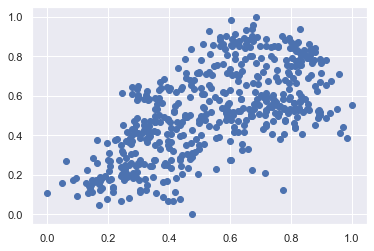

In [222]:
plt.scatter('temp','count',data=df_train)
plt.show()

In [223]:
# getting x train and y train
y_train = df_train.pop('count')
X_train = df_train

In [224]:
# Running RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [225]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

[('year', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 (1, False, 8),
 ('light rain & snow', True, 1),
 ('mist & cloudy', False, 2),
 ('Aug', False, 14),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 9),
 ('Sunday', False, 10),
 ('Thursday', False, 17),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15)]

In [226]:
# Columns to be used
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'light rain & snow', 'Jul', 'Sep'],
      dtype='object')

In [227]:
# new X_test 
X_train_rfe = X_train[col]

In [228]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [229]:
# creating model
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()

In [230]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 17 May 2021   Prob (F-statistic):          1.53e-184
Time:                        22:50:21   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -459.8296     16.985    -27.073      0.000    -493.200    -426.459
year                  0.2281      0.008     27.102      0.000       0.212       0.245
holiday              -0.0920      0.026     -3.472      0.001      -0.144      -0.040
temp                  0.5147      0.031     16.542      0.000       0.454       0.576
humidity             -0.2728      0.032     -8.542      0.000      -0.336      -0.210
windspeed            -0.1887      0.026     -7.194      0.000      -0.240      -0.137
spring               -0.1005      0.015     -6.536      0.000      -0.131      -0.070
winter                0.0653      0.013      5.153      0.000       0.040       0.090
light rain & snow    -0.1980      0.026     -7.659      0.000      -0.249      -0.147
Jul                  -0.0805      0.018     -4.538      0.000      -0.115      -0.046
Sep                   0.0598      0.016      3.723      0.000       0.028       0.091
==============================================================================
Omnibus:                       51.023   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.492
Skew:                          -0.593   Prob(JB):                     1.51e-22
Kurtosis:                       4.823   Cond. No.                     8.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
# dropping insignificant variables
X_train1= X_train_rfe.drop(["holiday"],1)
X_train2= sm.add_constant(X_train1)

# new mode
lm1 = sm.OLS(y_train.astype(float),X_train2.astype(float)).fit() 
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.7
Date:                Mon, 17 May 2021   Prob (F-statistic):          3.46e-183
Time:                        22:50:22   Log-Likelihood:                 483.60
No. Observations:                 510   AIC:                            -947.2
Df Residuals:                     500   BIC:                            -904.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -460.6939     17.170    -26.832      0.000    -494.428    -426.960
year                  0.2285      0.009     26.860      0.000       0.212       0.245
temp                  0.5144      0.031     16.353      0.000       0.453       0.576
humidity             -0.2699      0.032     -8.363      0.000      -0.333      -0.207
windspeed            -0.1898      0.027     -7.158      0.000      -0.242      -0.138
spring               -0.1033      0.016     -6.653      0.000      -0.134      -0.073
winter                0.0624      0.013      4.881      0.000       0.037       0.087
light rain & snow    -0.1953      0.026     -7.476      0.000      -0.247      -0.144
Jul                  -0.0797      0.018     -4.442      0.000      -0.115      -0.044
Sep                   0.0563      0.016      3.478      0.001       0.025       0.088
==============================================================================
Omnibus:                       60.586   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.786
Skew:                          -0.659   Prob(JB):                     3.98e-29
Kurtosis:                       5.101   Cond. No.                     8.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
X_train_new= X_train2.drop('const',axis=1)

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values.astype(float), i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [234]:
y_train_pred = lm1.predict(X_train2.astype(float))

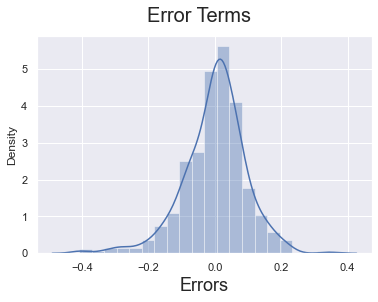

In [235]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

plt.show()

In [236]:
num_vars=['temp','humidity','windspeed','count']
df_test[num_vars]= scaler.transform(df_test[num_vars])

In [237]:
# test variables
y_test = df_test.pop('count')
X_test = df_test

In [238]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [239]:
#predictions
y_test_pred = lm1.predict(X_test_new.astype(float))

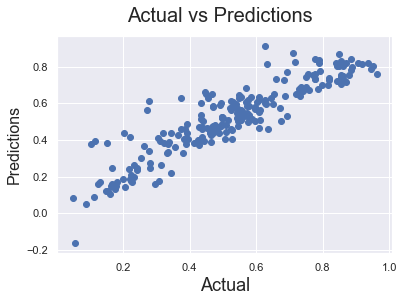

In [240]:
# actual vs predictions

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                     # Y-label

plt.show()

In [241]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)*100

81.66533735478743

In [212]:
#we get the final accuracy of 81.66%